# Assumptions of Linear Regression

Underlying linear regression is what we've been seeing all along: an hypothesis test. And just as we make assumptions in order to draw conclusions from the results of our hypothesis tests, so too linear regression makes assumptions about the data used in constructing the analysis.

The assumptions of linear regression are mostly captured by the following points:

1. The true relationship is linear
2. No multicollinearity between independent variables
3. Errors are normally distributed with mean 0
4. Errors are homoskedastic (aka they have constant variance)
5. Errors are not correlated (no trends in error terms)


![the office "you're making some very dangerous assumptions" gif from gfycat](https://thumbs.gfycat.com/DarkParallelArizonaalligatorlizard-size_restricted.gif)

## General Strategy When Finding Violations of Assumptions

No model is perfect, and your assumptions will never hold perfectly. If the violations of assumptions are severe, you can try adjusting the data so the assumptions will hold, such as by:

- Transforming your data with a non-linear function (e.g. $log$)
- Only modeling a subset of your data
- Dropping outliers

These can make it harder to explain or interpret your model, but the trade-off may be worth it. Alternatively, you may be better of just using a different type of model (you will learn many).

Let's dig deeper.

## Regression Model of Diamond Price

In preparation for putting these assumptions to the test, let's set up a linear regression.

Specifically, we're going to set up a multiple linear regression - that's right, we're now using multiple X variables! We'll talk through the implications of this more in the next lecture, but this will help us explore our assumptions.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
# Let's talk through this - some initial prep work on our X variables
X = diamonds.select_dtypes(float)
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

In [7]:
# Now grabbing our y variable
y = diamonds['price']

In [8]:
results = sm.OLS(y, sm.add_constant(X_scaled)).fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:13:12   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3932.7997      6.445    610.167      0.000    3920.167    3945.433
x1          5065.3837     29.958    169.085      0.000    5006.667    5124.101
x2          -291.0401      7.885    -36.910      0.000    -306.495    -275.585
x3          -228.9117      6.892    -33.216      0.000    -242.419    -215.404
x4         -1475.8509     48.314    -30.547      0.000   -1570.547   -1381.155
x5            75.7475     29.150      2.599      0.009      18.612     132.883
x6            29.3763     31.265      0.940      0.347     -31.904      90.657
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking Each Assumption

## 1. Linearity

**The relationship between the target and predictors is linear.** This is of course the fundamental and most obvious assumption of the linear model.

Why do we assume linearity? Because, by modeling the relationship using _linear_ regression - if we don't think the relationship is linear, we probably should use a different model.

I'll note that linear regression can still handle curvature in the relationship using polynomial variables, interaction terms, etc (more on that later) - but this assumption captures the idea that linear parameters (aka coefficients) can capture the relationship between X and y.

This assumption can be checked by:
- using scatterplots - plotting the dependent variable against every independent variable
- calculating correlations

#### Target Vs. Predictor Plot

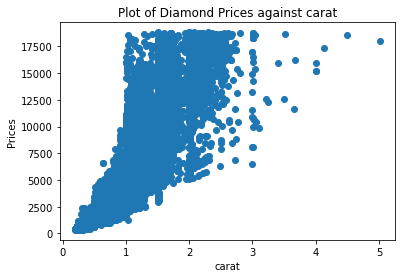

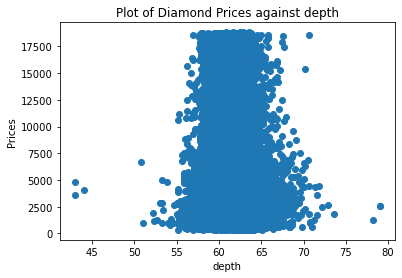

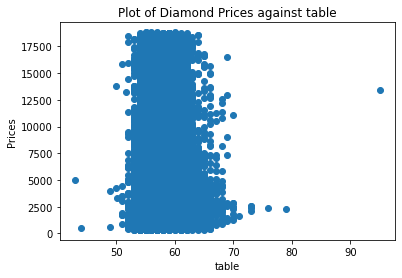

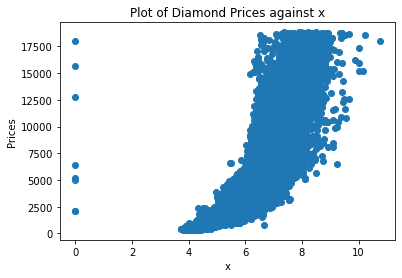

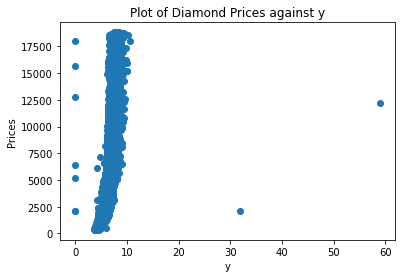

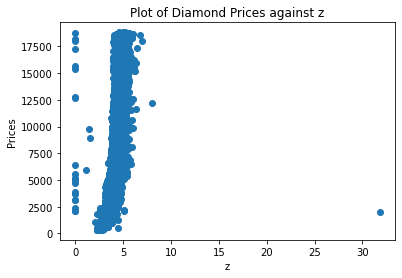

In [10]:
features = X.columns

for x in features:
    plt.scatter(X[x], y)
    plt.title(f'Plot of Diamond Prices against {x}')
    plt.xlabel(x)
    plt.ylabel('Prices')
    plt.show()

There are definitely correlations here, although these perhaps look more like curves than lines!

However, we have to be careful in using this strategy to test for linearity.

Consider the following (tiny) example:

Suppose our target $Z$ is (approximately) a linear combination of the two variables $X$ and $Y$, and in fact can be described as $Z = 2X + 3Y + \epsilon$.

Suppose further that our data-sampling process has produced an unfortunate result:

In [11]:
training_X_values = [1, 2, 3]
training_Y_values = [1, 2, 8]

In this case, even though $Z$ is a linear combination of the variables $X$ and $Y$, it is *not* a linear function of $X$ alone. The bad luck here is that:
- $Y$-values increase with $X$-values, but
- this change in $Y$ won't show up on a $Z$-vs.-$X$ plot!

In [12]:
np.random.seed(42)

target = [2*x + 3*y + np.random.rand() for x, y in zip(training_X_values, training_Y_values)]

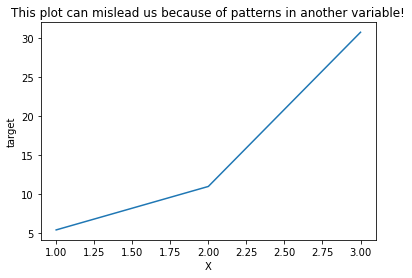

In [13]:
fig, ax = plt.subplots()

ax.plot(training_X_values, target)
ax.set_xlabel('X')
ax.set_ylabel('target')
ax.set_title('This plot can mislead us because of patterns in another variable!');

This graph may lead us to doubt that our target is not usefully modeled as a linear combination of features, when in fact we are seeing this non-linearity only because of a chance correlation between $X$ (plotted here) and $Y$ (not taken into account by this plot at all).

See also the Level Up below on `statsmodels.graphics.plot_regress_exog()`.

A quicker solution to visualize these trends is to use Seaborn's `pairplot`.  

This lets us check for linearity and multicollinearity (the next assumption we'll check) at the same time.

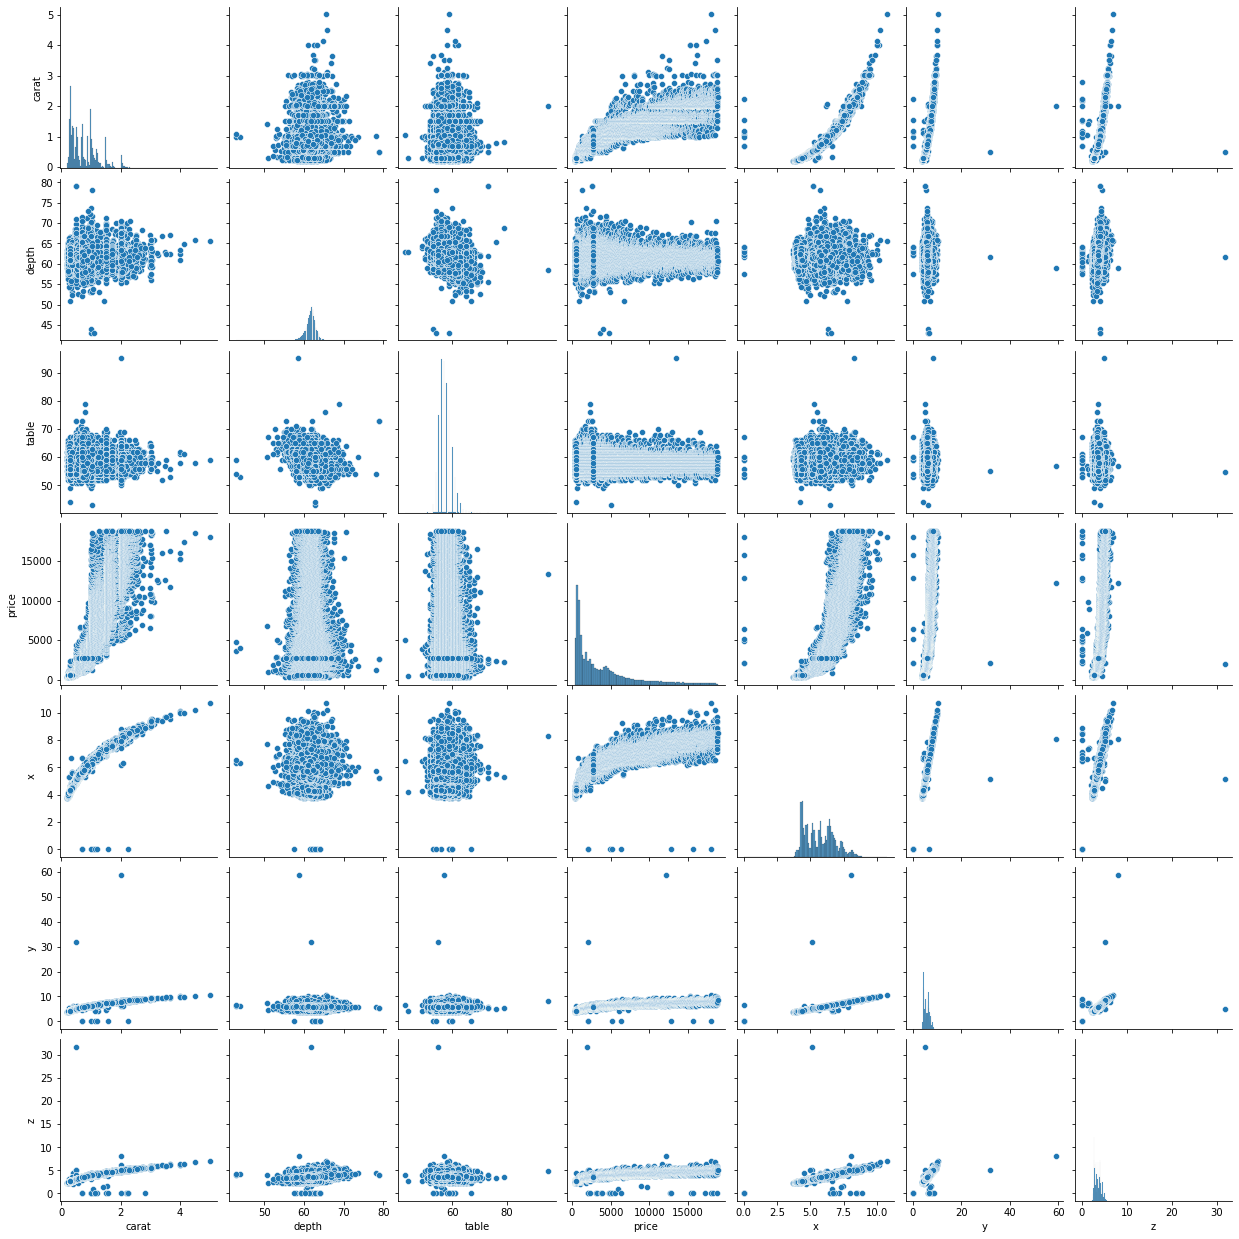

In [14]:
sns.pairplot(diamonds)
plt.show()

#### Calculate Pearson's R Value

Pearson's R represents a correlation coefficient. 

In [15]:
# check correlations just against sales
diamonds.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

### And if it Fails the Check?

If the relationship between predictors and target is non-linear, then we'll need either a different sort of model altogether or a linear regression with some non-linear terms. Most obviously, we could try adding some **polynomial terms** such as $X_1X_2$ or $X_3^4$, but if we have a reason (because of some helpful EDA) to suspect a different type of relationship, we could also try more exotic transformations, such as $sin(X_1)$ or $e^{-X_5}$.

## 2. Predictors Are Independent: No *Multicollinearity*

A further assumption for *multiple* linear regression is that **the predictors are independent**. Multicollinearity refers to a correlation between distinct predictors. Why might high multicollinearity be a problem for interpreting a linear regression model?

It's problematic for statistics in an inferential mode because, if $x_1$ and $x_2$ are highly correlated with $y$ but also *with each other*, then it will be very difficult to tease apart the effects of $x_1$ on $y$ and the effects of $x_2$ on $y$. If I really want to have a good sense of the effect of $x_1$ on $y$, then I'd like to vary $x_1$ while keeping the other features constant. But if $x_1$ is highly correlated with $x_2$ then this will be a practically impossible exercise!

Statistically speaking, when variables are correlated then *so will the associated betas*, and thus the betas will be highly volatile and have large errors, again leading to an increased risk of **false negative** conclusions about the significance of variables. See again [here](https://towardsdatascience.com/linear-regression-assumptions-why-is-it-important-af28438a44a1).

A simpler way to explain this: a model with multicollinear features will have trouble determining which change in what X variable is actually influencing `y`.

### How to Check

- using scatterplots - plotting the independent variables against each other (pairplot, above)
- calculating correlations (bonus: visualizing them in a heatmap)
- checking the model's Condition Number
- calculating their Variable Inflation Factor (VIF) scores

#### Directly Explore Correlations

In [16]:
# check all correlations using the same Pearson's correlation coefficient
X.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


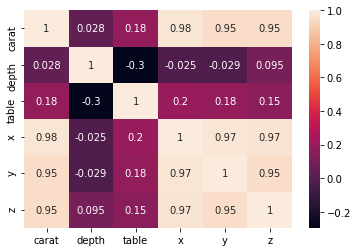

In [17]:
# can also visualize it
sns.heatmap(X.corr(), annot=True)
plt.show()

#### Condition Number

[Formally](https://en.wikipedia.org/wiki/Condition_number), the condition number is a measure of the volatility in the output of a function given a small change in the input.

In the case of linear regression what is calculated is the condition number of the *correlation matrix* of the data. This number represents the volatility of the linear action of the matrix and so, since correlated variables will produce greater volatility, is effectively a measure of multicollinearity.

The condition number of a matrix is related to its *eigendecomposition*. We'll return to this concept in later lessons.

<details>
    <summary> Click here for more details </summary>
<code>corr_mat = np.corrcoef(X_scaled, rowvar=False)
eigvals = np.linalg.eig(corr_mat)[0]
cond_no = np.sqrt(eigvals.max()) / np.sqrt(eigvals.min())
cond_no</code>
    </details>

In [18]:
results.summary().tables[2]

Omnibus:,14093.399,Durbin-Watson:,1.249
Prob(Omnibus):,0.000,Jarque-Bera (JB):,373568.966
Skew:,0.674,Prob(JB):,0.00
Kurtosis:,15.822,Cond. No.,17.3


Our condition number is well below the danger zone around 1000 or so, so by this test we don't seem to have strongly interdependent variables.

#### Calculate the Variance Inflation Factor (VIF)

> "Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is **equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable**. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model."

-- Source: https://www.investopedia.com/terms/v/variance-inflation-factor.asp

In other words - how well does one of these X variables predict the others?

reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# label the scores with their related columns
vif["features"] = X.columns

vif

,VIF,features
0,70.132799,carat
1,515.146274,depth
2,500.595341,table
3,1284.949828,x
4,530.998218,y
5,540.677349,z


### And if it Fails the Check?

The most straightforward thing to do is to drop predictors that are strongly correlated with others.

We might in our case consider building a model that drops `x`, `y`, and `z` altogether.

> Multicollinearity will be a recurring theme. For more, see [this post](https://towardsdatascience.com/https-towardsdatascience-com-multicollinearity-how-does-it-create-a-problem-72956a49058) and [this slide deck](https://www.sjsu.edu/faculty/guangliang.chen/Math261a/Ch9slides-multicollinearity.pdf).

# Checking Residuals

By checking the residuals, aka the error between our actual y values and what we predicted, we can check that:

- Errors are normally distributed with mean 0
- Errors are not correlated (no trends in error terms)
- Errors are homoskedastic (aka they have constant variance)

That's right, we can check three assumptions at once!

In a nutshell:

<img src="images/error-dist.jpeg" width="550">  


In [20]:
# Calculate our residuals
# first need our predicted values
y_preds = results.predict(sm.add_constant(X))
y_preds

/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0       -30848.025916
1       -31753.614457
2       -31942.651507
3       -31836.924743
4       -32191.557444
             ...     
53935   -31110.351559
53936   -31230.895438
53937   -32351.945295
53938   -31244.338508
53939   -31013.645941
Length: 53940, dtype: float64

In [21]:
# Now our residuals!
resids = y - y_preds

## 3. Independence

**The errors are independent**. In other words: Knowing the error for one point doesn't tell you anything about the error for another. With correlated errors our model will tend to underestimate the errors around our betas, and so we run the risk of **false positive** conclusions about the significance of variables. See [here](https://towardsdatascience.com/linear-regression-assumptions-why-is-it-important-af28438a44a1).

### How to Check

- Make a scatter plot of the residuals and target values and look for patterns
- Check the value of the Durbin-Watson statistic.

### And if it Fails the Check?

If there are trends in our errors, the general strategy is to try to **model** those trends. We'll come back to this idea when we explore time-series modeling.

## 4. Normality

**The errors are normally distributed.** That is, smaller errors are more probable than larger errors, according to the familiar bell curve. This is basically a conseqence of the Central Limit Theorem. If an error is a sum of influences from a large collection of (untracked!) variables, then the CLT assures us that that sum will have a normal distribution, regardless of the distributions of the untracked variables themselves.

### How to Check

- Make a histogram of the residuals
- Build a QQ-Plot
- Check the Jarque-Bera or Omnibus p-value (from `statsmodels` output)

#### Histograms

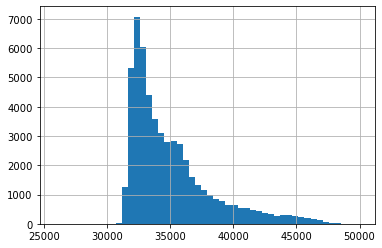

In [22]:
resids.hist(bins=50);

To eliminate the outliers from the plot we might try zooming in on the center:

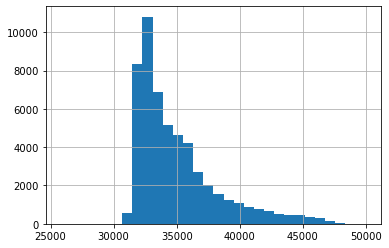

In [23]:
resids[abs(resids) < 50000].hist(bins=30);

These look fairly normal.

#### QQ Plot

/opt/anaconda3/envs/python3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


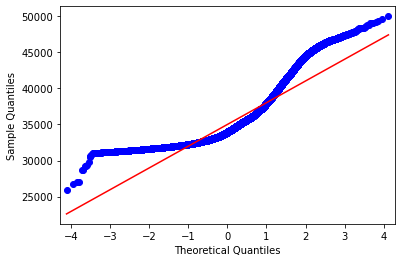

In [24]:
sm.qqplot(resids, line='r');

When the errors are normal, they will follow the diagonal line closely. Here we see some significant divergences.

#### Statistical Tests

The null hypothesis for the Jarque-Bera Test is that errors are normally distributed. Here we have a huge test statistic and tiny p-value. So we have to reject this null hypothesis. Similarly, the `statsmodels` Omnibus test tests for skewness and kurtosis (see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate)), and so we are looking for small numbers. But again we see the opposite.

In [25]:
results.summary().tables[2]

Omnibus:,14093.399,Durbin-Watson:,1.249
Prob(Omnibus):,0.000,Jarque-Bera (JB):,373568.966
Skew:,0.674,Prob(JB):,0.00
Kurtosis:,15.822,Cond. No.,17.3


### And if it Fails the Check?

Non-normal errors are often the result of non-normal variables. In the present case, we note the exponential distribution of the target itself:

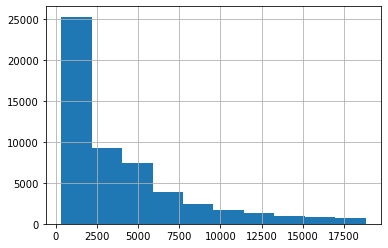

In [26]:
y.hist();

So a good idea here would be to transform the target, perhaps with a logarithm, and then try the model again. This is an exercise below.

## 5. Homoskedasticity

**The errors are homoskedastic (or homos$\underline{c}$edastic).** That is, the errors have the same variance. 

If errors are not homoskedastic, betas will have larger errors, leading to a greater risk of **false negative** conclusions about the significance of variables. Once again, see [this post](https://towardsdatascience.com/linear-regression-assumptions-why-is-it-important-af28438a44a1).

### How to Check

- Make a scatter plot of the residuals and target values and look to see if they are more or less spread out at different places
- There are also statistical tests for this such as Goldfeld-Quandt (`sm.stats.diagnostic.het_goldlfeldquandt`) and Breusch-Pagan (`sm.stats.diagnostic.het_breuschpagan`).

#### Scatter Plot

We reproduce the plot from above, when we checked for independence of errors:

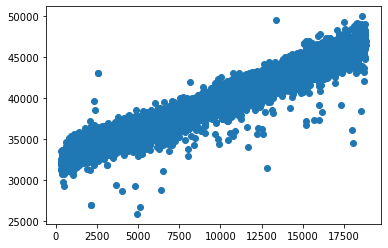

In [27]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

See how the errors get more spread out with larger values of the target? That's **heteroskedasticity**, the opposite of what we're looking for.

### And if it Fails the Check?

Often when errors are heteroskedastic they will be greater for greater values of the target. If the target has an exponential distribution, with lots of small values and few large values, then the model will tend to focus on the smaller values in calculating its betas, producing volatility for the higher end of the spectrum. And so we'll see greater divergence in the errors for larger values of the target.

This is exactly what we see here. In such a case it can help to apply some transformation to the target that will rein in the larger values.

## Summary for Why We Check Residuals (And How We Can Fix Common Problems)

#### Typical Residuals vs. Predictions plots:

- **The ideal scenario**

    - Random scatter
    - Scattered around 0
    - No identifiable trend
    
    <img src="images/normal-resid.png" width="550">  
    
- **Non-linear relationship**

    - Clear non-linear scatter, but
    - Identifiable trend
    - **Fix:** Introduce polynomial terms
    - **Fix:** Variable transformation
    
    <img src="images/polynomial-resid.png" width="550">

- **Autocorrelation**

    - Identifiable trend, or
    - Consecutively positive/negative residuals
    - **Fix:** Consider sequential analysis methods (which we'll discuss in phase 4)
    
    <img src="images/autocorrelation.png" width="550">

- **Heteroskedasticity**

    - The spread of residuals is different at different levels of the fitted values
    - **Fix:** Variable transformation (log)  
    
    <img src="images/heteroskedasticity.png" width="550">
    


Note: a library named [Yellowbrick](https://www.scikit-yb.org/en/latest/index.html) has code for a nice Residuals Plot built out for you (works if you're using a sklearn model) - https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

## Other Potential Problems

- Outliers

    <img src='images/outliers.png' width=450>

- High Leverage Points 

    <img src='images/leverage.png' width=450>

## Resources

- [Penn State Stats on Influential Points (outliers, high leverage points)](https://online.stat.psu.edu/stat462/node/87/) - this resource also allows easy access to the rest of their material on regression

- [Statsmodels' Documentation: Check the influence of outliers](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- [Long blog post on regression diagnostics with implementation in python](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)

- [Statistics by Jim: Linear Regression Assumptions](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

-----

## Level Up: `statsmodels.graphics.plot_regress_exog()`

Observe the return of this function:

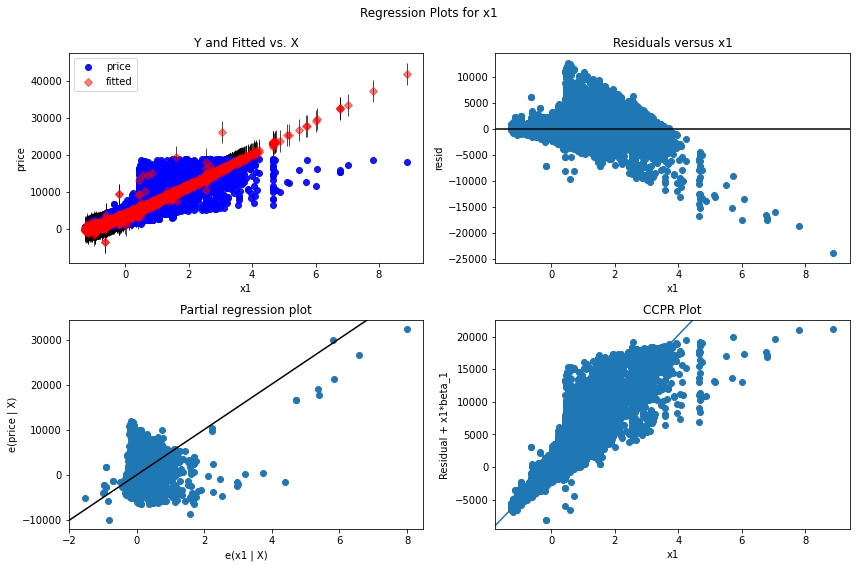

In [29]:
# 'x1' is the carat variable
sm.graphics.plot_regress_exog(results, 'x1', fig=plt.figure(figsize=(12, 8)));

What are these four plots?

- "Y and Fitted vs. X": This shows actual target values vs. predictions. Notice:
    - the predictions have error bars that reflect the errors reported in the model summary
    - the predictions do not form a perfect line since we have other predictors in the model.
- "Residuals versus x1": Imagine taking the last plot and rotating it so that the prediction line is the x-axis. This plot shows how far off our model's predictions are as a function of the input. Remember that such plots can tell us about whether our model satisfies the assumption that our errors are homoskedastic.
- ["Partial regression plot"](https://en.wikipedia.org/wiki/Partial_regression_plot): This plots the residuals of a model of price given everything except x1 vs. the residuals of a model of x1 given everything except x1. This sort of plot can be especially useful for locating outliers as well as checking our regression assumptions. Note that the slope of the line is equal to $\beta_1$.
- ["CCPR Plot"](https://en.wikipedia.org/wiki/Partial_residual_plot): "Component-and-component-plus-residual Plot". This shows the best-fit line for x1 and the residuals of the model as a whole.